# MQBS Assignment 1

## Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data

In [3]:
data = pd.read_csv('customer_shopping_data.csv')

In [4]:
data.head(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,8/05/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,11/09/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,5/16/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,10/24/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,5/24/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,3/13/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,1/13/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,11/04/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,8/22/2021,Kanyon


## 1. Data Cleaning

### We Check for the duplicate values in unique value only columns

In [5]:
data['invoice_no'].value_counts()
# THERE ARE SOME DUPLICATE INVOICE NUMBERS

invoice_no
I120948    2
I170876    2
I218385    2
I138884    1
I336619    1
          ..
I308780    1
I319287    1
I173400    1
I828064    1
I232867    1
Name: count, Length: 99458, dtype: int64

In [6]:
# DUPLICATE INVOICE NUMBERS 1
data[data['invoice_no'] == 'I120948']

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
249,I120948,C340089,Female,54,Shoe,4,2400.68,Debit Card,44416,Mall of Istanbul
250,I120948,C340089,Female,54,Shoes,4,2400.68,Debit Card,8/08/2021,Mall of Istanbul


In [7]:
# DUPLICATE INVOICE NUMBERS 2
data[data['invoice_no'] == 'I170876']

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99389,I170876,C320288,Male,40,Food,3,15.69,Cash,44787,Metrocity
99390,I170876,C320288,Male,40,Food & Beverage,3,15.69,Cash,8/14/2022,Metrocity


In [8]:
# DUPLICATE INVOICE NUMBERS 3
data[data['invoice_no'] == 'I218385']

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
236,I218385,C290280,Female,51,Toys,1,35.84,Cash,44761,Metrocity
237,I218385,C290280,Female,51,Toys,1,35.84,Cash,7/19/2022,Metrocity


### Now we know the index of the duplicate values, so we drop them

In [9]:
# DROP DUPLICATE INVOICE NUMBERS
data.drop(index=[249, 99389, 236], inplace=True)

### Same process for Customer ID

In [10]:
data['customer_id'].value_counts()

customer_id
C223892    2
C241288    1
C868105    1
C382765    1
C285074    1
          ..
C220083    1
C286933    1
C301304    1
C214184    1
C273973    1
Name: count, Length: 99457, dtype: int64

In [11]:
data[data['customer_id'] == 'C223892']

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
53605,I565442,C223892,Female,51,Books,2,30.30,Debit Card,1/12/2023,Emaar Square Mall
53606,I565111,C223892,Female,99,Books,1,0.99,##error##,44938,Mall of Istanbul


### Drop duplicate index

In [12]:
data.drop(index=53606, inplace=True)

### Now we Check for misspelled values in the non-unique columns(gender, category and payment method)

In [13]:
print('Raw data: ',data['gender'].unique())

data['gender'].replace('Mal','Male', inplace=True)

print('After correction: ',data['gender'].unique())

Raw data:  ['Female' 'Male' 'Mal']
After correction:  ['Female' 'Male']


In [14]:
print('Raw data: ',data['category'].unique())

data['category'].replace({'Toy': 'Toys', 'Clothi': 'Clothing', 'Boks' : 'Books', 'Cosmetic' : 'Cosmetics', 'Tech' : 'Technology'}, inplace=True)

print('After correction: ',data['category'].unique())

Raw data:  ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys' 'Clothi'
 'Technology' 'Toy' 'Boks' 'Souvenir' 'Cosmetic' 'Tech']
After correction:  ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


In [15]:
print('Raw data: ',data['payment_method'].unique())

data['payment_method'].replace({'Cash Cash' : 'Cash', 'CreditCard' : 'Credit Card'}, inplace=True)

print('After correction: ',data['payment_method'].unique())

Raw data:  ['Credit Card' 'Debit Card' 'Cash' nan 'Cash Cash' 'CreditCard']
After correction:  ['Credit Card' 'Debit Card' 'Cash' nan]


### Now we Clean the Invoice_Date column to drop all the values which are not date

In [16]:
def rem_date(x):
    if x.find('/') == 1:
        return x
    else:
        return np.nan
    
data['invoice_date'] = data['invoice_date'].apply(rem_date)
data.dropna(subset=['invoice_date'], inplace=True)

### Checking for NaN values

In [18]:
data.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             2
payment_method    1
invoice_date      0
shopping_mall     0
dtype: int64

### We fill the NaN values in Price by imputing the values using mean values of category

In [19]:
group = data.groupby('category')

for i in data[data['price'].isna()].index:
    data['price'].fillna(group['price'].mean()[data.iloc[i]['category']], inplace=True)

### We fill the NaN values in Payment method by imputing the values using mode

In [20]:
data['payment_method'].fillna(data['payment_method'].mode()[0], inplace=True)

### Final Check for NaN values

In [21]:
data.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

### Creating a histogram for data distribution visualisation

### Age

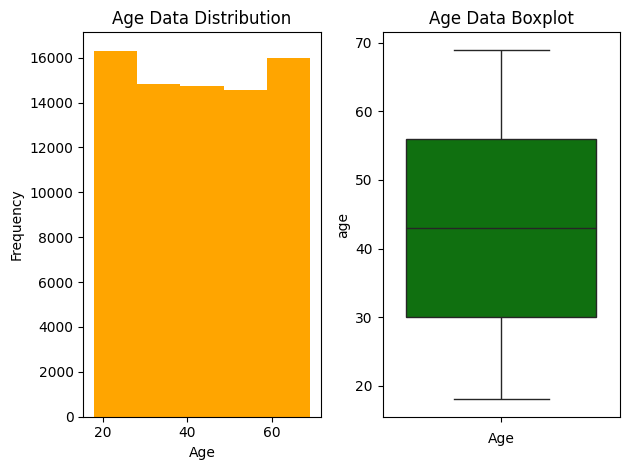

In [31]:
plt.subplot(1, 2, 1)
data['age'].plot(kind='hist', bins=5, color='orange')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Data Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(data['age'],color='green')
plt.xlabel('Age')
plt.title('Age Data Boxplot')
plt.tight_layout()
plt.show()

### Quantity

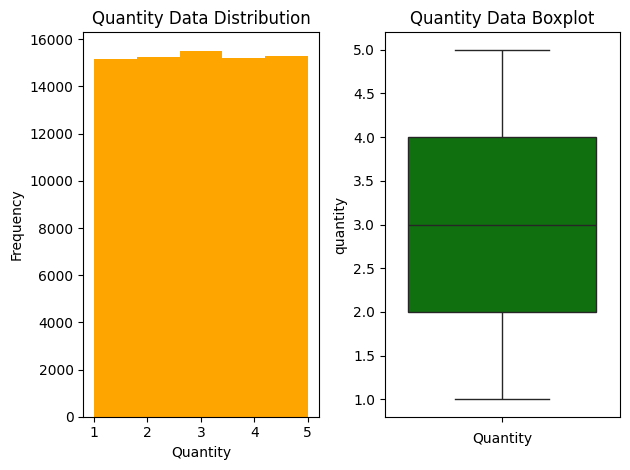

In [34]:
plt.subplot(1, 2, 1)
data['quantity'].plot(kind='hist', bins=5, color='orange')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Quantity Data Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(data['quantity'], color = 'green')
plt.xlabel('Quantity')
plt.title('Quantity Data Boxplot')
plt.tight_layout()
plt.show()

### Price

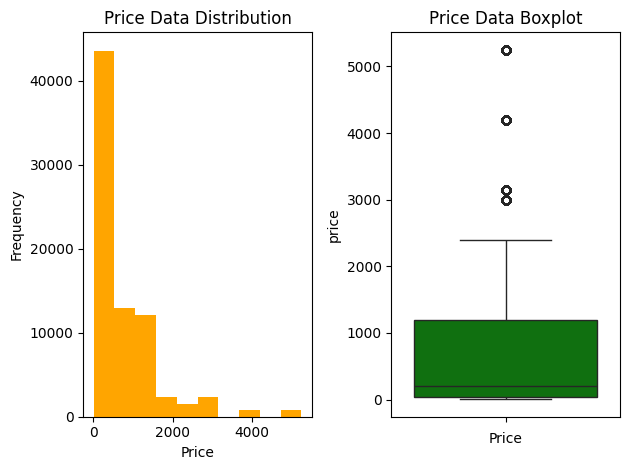

In [35]:
plt.subplot(1, 2, 1)
data['price'].plot(kind='hist', bins=10, color='orange')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Data Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(data['price'], color = 'green')
plt.xlabel('Price')
plt.title('Price Data Boxplot')
plt.tight_layout()
plt.show()

### Removing outliers in the price column

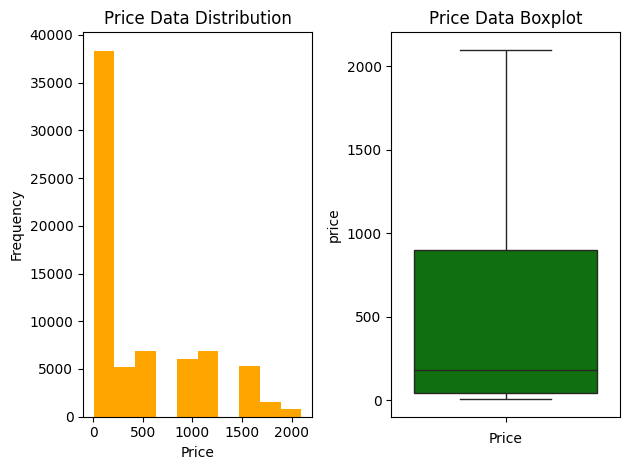

In [38]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['price'] <= upper_bound)]

plt.subplot(1, 2, 1)
data['price'].plot(kind='hist', bins=10, color='orange')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Data Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data['price'],color='green')
plt.xlabel('Price')
plt.title('Price Data Boxplot')

plt.tight_layout()
plt.show()

## 2. Analysis

### Some items have high cost while some item sell in large quantities, so alone cost or qunatity can't tell the sale of item. So we create a new column 'final_sale' which is Price x Quantity

In [39]:
data['final_sale'] = data['price'] * data['quantity']

### Q1. Which customer segments/categories should the shopping mall target for marketing campaigns?

Text(0.5, 1.0, 'Mean Final Sale Distribution')

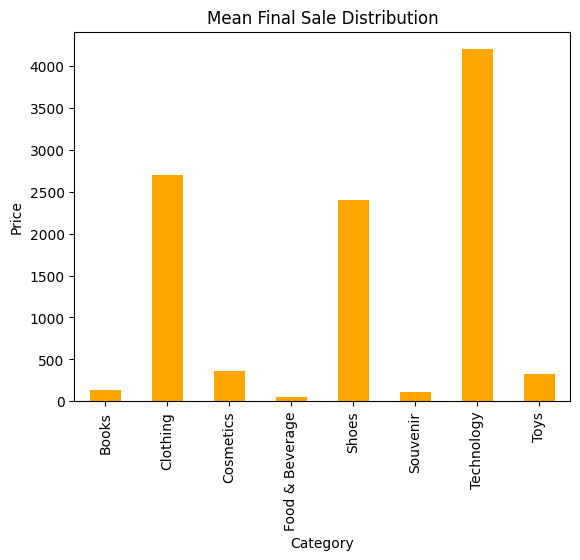

In [41]:
data.groupby('category')['final_sale'].median().plot(kind='bar', color='orange')
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Mean Final Sale Distribution')

### The Shopping malls should target Technology, Clothing and Shoes for the marketing campaigns as they are top 3 categories (In Descending order) with highest median Final sale

### Q2. Box plots to compare the distributions of spending scores between botht the genders

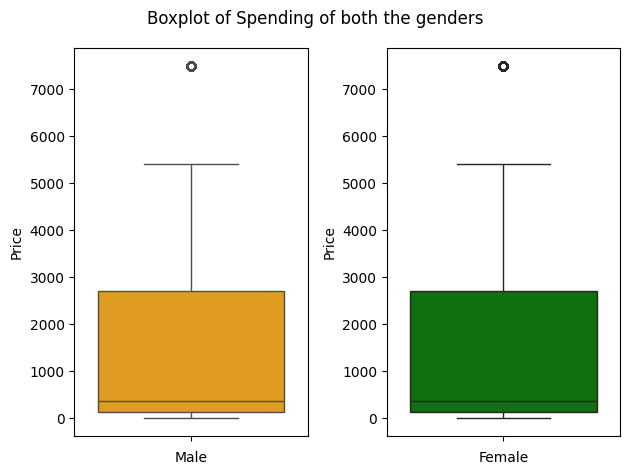

In [45]:
plt.subplot(1, 2, 1)
plt.suptitle('Boxplot of Spending of both the genders')
sns.boxplot(data[data['gender'] == 'Male']['final_sale'],color='orange')
plt.xlabel('Male')
plt.ylabel('Price')


plt.subplot(1, 2, 2)
sns.boxplot(data[data['gender'] == 'Female']['final_sale'],color='green')
plt.xlabel('Female')
plt.ylabel('Price')


plt.tight_layout()
plt.show()

### The expenditure is approximately same for both the genders

### Q3. Segment the customers into different age groups (e.g., 18-25, 26-35, 36-45, 46-55, 56+). How does the spending score vary across these age groups?

/var/folders/9v/2zycdzd52klcv1ycb1tm3f440000gn/T/ipykernel_67323/1607033600.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = data.groupby('age_bin');


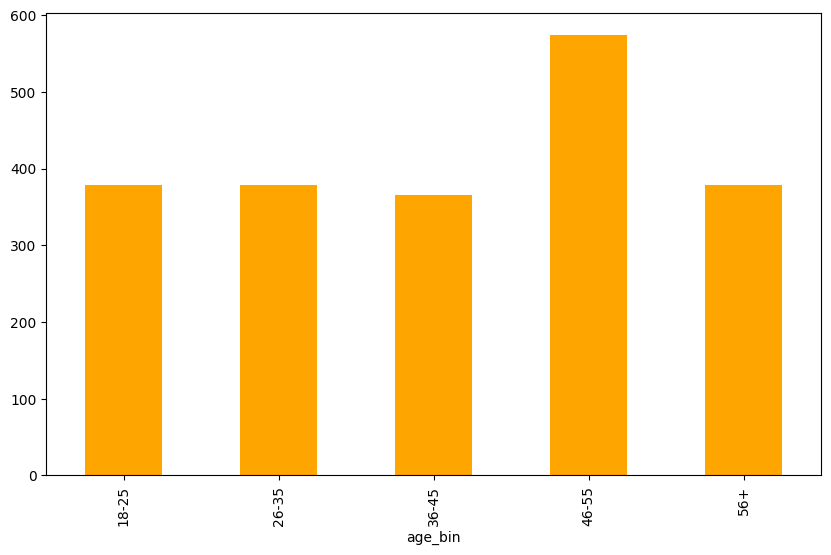

In [63]:
age_groups = pd.cut(data['age'], bins=[18, 25, 35, 45, 55, np.inf], labels=['18-25', '26-35', '36-45', '46-55', '56+'])
data['age_bin'] = age_groups
plt.figure(figsize=(10,6))
group = data.groupby('age_bin')
group['final_sale'].median().plot(kind='bar',color='orange')

### The expenditure is similar in all the segments except the age bin (46-55), which spends nearly 1.5 times more than all other age bins

## 3. Recommendation

### Visualizing the proportions of Final sales made by different Payment methods

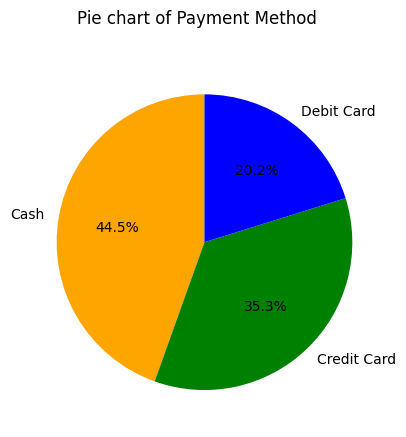

In [59]:
data['payment_method'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'green', 'blue'])
plt.suptitle('Pie chart of Payment Method')
plt.ylabel('');

### The top preference of customers for payment is Cash which is followed by Credit Card then. So, the Shopping malls should bring out offers on these payment methods to increase the sales more

### Trend line to visualize the total monthly sales over the period

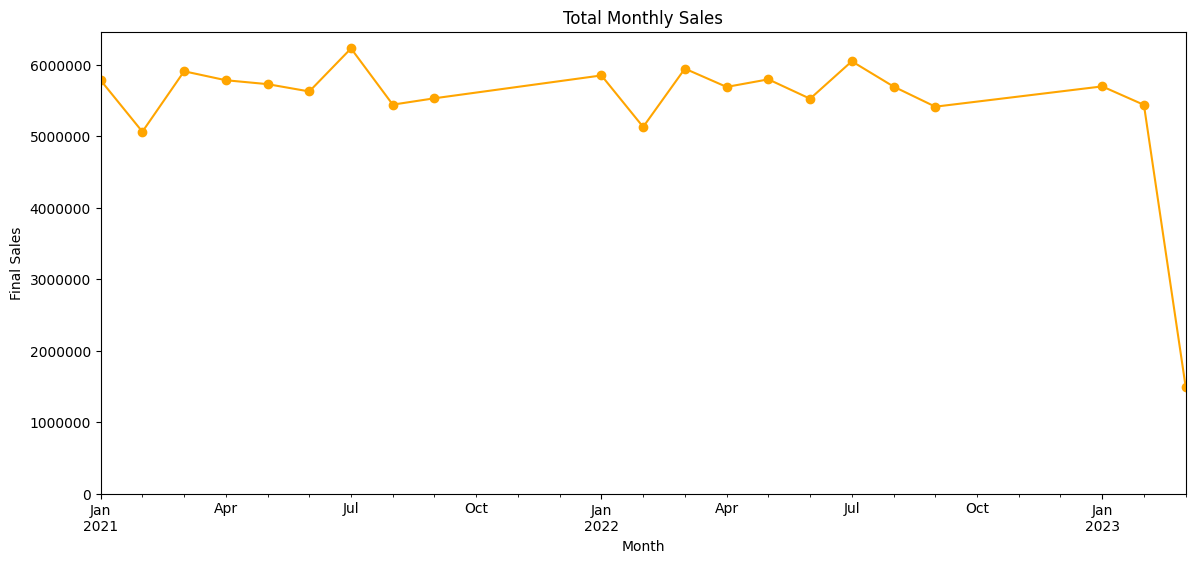

In [60]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'])

monthly_sales = data.groupby(data['invoice_date'].dt.to_period('M'))['final_sale'].sum().astype(int)

monthly_sales.plot(kind='line', marker='o', color = 'orange', figsize=(14, 6))
plt.xlabel('Month')
plt.ylabel('Final Sales')
plt.title('Total Monthly Sales')
plt.yticks(np.arange(0, monthly_sales.max()+1, 1000000).astype(int), np.arange(0, monthly_sales.max()+1, 1000000).astype(int)) 
plt.show()

### Each year, there is a seasonal decrease in sales around February and a seasonal increase around July-June. So the Malls should stock there supplies according to the forecasted demand